In [51]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from MachineTrading.AlgoTradingApp.app_run import AppBond
from MachineTrading.Utils.pnl_calculator import PnLCalculator, compute_pnl
from prettytable import PrettyTable
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

In [2]:
BTP_ISINS = [x.split('.')[0] for x in os.listdir("../AlgoTradingApp/Data/BondInfo") if 'IT0' in x]

In [3]:
bonds = {x:AppBond(x) for x in BTP_ISINS}

In [18]:
for isin, b in bonds.items():
    b.update_data(dt.date(2022,3,23))

Calling - update_data for isin IT0005217390
Calling - update_data for isin IT0005365165
Calling - update_data for isin IT0005377152
Calling - update_data for isin IT0005390874
Calling - update_data for isin IT0005408502
Calling - update_data for isin IT0005413171
Calling - update_data for isin IT0005424251
Calling - update_data for isin IT0005425233
Calling - update_data for isin IT0005433195
Calling - update_data for isin IT0005433690
Calling - update_data for isin IT0005440679
Calling - update_data for isin IT0005441719
Calling - update_data for isin IT0005447187
Calling - update_data for isin IT0005449969
Calling - update_data for isin IT0005454241
Calling - update_data for isin IT0005466013
Calling - update_data for isin IT0005482937
Calling - update_data for isin IT0005486748


In [19]:
data = []
for isin, b in bonds.items():
    data.append((isin, b.years_to_maturity , b.yld))

In [22]:
data = sorted(data, key=lambda x: x[1])

In [26]:
data = pd.DataFrame(data)
data.columns = ['Isin', 'Maturity', 'Yield']

In [33]:
def nelson_siegel(T, tau, b0, b1, b2):
    x = T/tau
    return b0 + b1* (1-np.exp(-x))/x + b2*((1-np.exp(-x))/x - np.exp(-x))        

In [35]:
popt, pcov = curve_fit(nelson_siegel, data['Maturity'].values, data['Yield'].values)

In [71]:
data['NS'] = y2/100
data['Residual'] = data['NS']-data['Yield']
data['ResidualPercentage'] = data['Residual']/np.abs(data['Yield'])*100

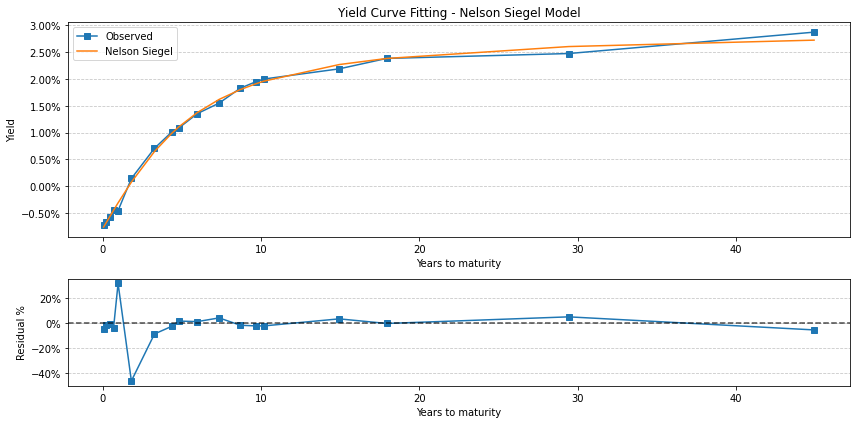

In [92]:
x = data['Maturity'].values
y =  data['Yield'].values*100
y2 = nelson_siegel(x, popt[0], popt[1], popt[2], popt[3])*100

fig, axes = plt.subplots(figsize=(12,6), nrows=2, gridspec_kw={'height_ratios': [2, 1]})

axes[0].plot(x, y, 's-', label='Observed', alpha=1.0)
axes[0].plot(x, y2, label='Nelson Siegel')

axes[0].grid(axis='y', alpha=0.7, ls='--')
axes[0].legend()
axes[0].set_title("Yield Curve Fitting - Nelson Siegel Model")
axes[0].set_xlabel("Years to maturity")
axes[0].set_ylabel("Yield")
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())

axes[1].plot(x, data['ResidualPercentage'], 's-', label='Residuals', alpha=1.0)
axes[1].set_xlabel("Years to maturity")
axes[1].set_ylabel("Residual %")
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].grid(axis='y', alpha=0.7, ls='--')
axes[1].axhline(0, ls='--', color='k', alpha=0.7)

plt.tight_layout()
plt.show()